In [1]:
import os
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import h5py
from oasis.functions import deconvolve
from oasis import oasisAR1, oasisAR2
import pyute as ut

from importlib import reload
reload(ut)
import scipy.ndimage.filters as sfi
import scipy.stats as sst
import scipy.ndimage.measurements as snm
from mpl_toolkits.mplot3d import Axes3D
import figure_ground_analysis as fg
reload(fg)
import pdb

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
folds = []
files = []
rets = []
adjust_fns = []
rgs = []
criteria = []
datafoldbases = []


def tack_on(thisfold,thisfile,retnumber,frame_adjust=None,rg=(0,0),criterion=lambda x: np.abs(x)>100,datafoldbase=None):
    folds.append(thisfold)
    files.append(thisfile)
    rets.append(retnumber)
    adjust_fns.append(frame_adjust)
    rgs.append(rg)
    criteria.append(criterion)
    datafoldbases.append(datafoldbase)
    

thisfold = '180713/M9053/'
thisfile = 'M9053_125_003'
retnumber = '001'
rg = (1,0)
datafoldbase = '/media/mossing/backup_1/data/2P/'
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '180714/M9053/'
thisfile = 'M9053_140_005'
retnumber = '003'
rg = (1,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '180821/M9417/'
thisfile = 'M9417_140_007'
retnumber = '006'
rg = (1,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

thisfold = '181117/M10039/'
thisfile = 'M10039_150_004'
retnumber = '002'
rg = (1,0)
tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)

#thisfold = '190107/M10036/'
#thisfile = 'M10036_050_004'
#retnumber = '003'
#rg = (1,0)
#tack_on(thisfold,thisfile,retnumber,rg=rg,datafoldbase=datafoldbase)


In [3]:
reload(fg)
if not os.path.exists('procfiles'):
    os.mkdir('procfiles')
# soriavg,strialavg,lb,ub,pval_fig,pval_grnd,nbydepth = fg.analyze_everything(folds,files,rets,adjust_fns)
# soriavg,proc = fg.analyze_everything_by_criterion(folds,files,rets,[None]*len(folds),datafoldbase=datafoldbases,stimfoldbase='/home/mossing/modulation/visual_stim/',rgs=rgs)

In [4]:
procname = 'procfiles/sst_figure_ground_proc.hdf5'
dsname = '../shared_data/sst_l23_data_struct.hdf5'

if os.path.exists(procname):
    os.remove(procname)

session_ids = fg.analyze_simply(folds,files,rets,[None]*len(folds),datafoldbase=datafoldbases,stimfoldbase='/home/mossing/modulation/visual_stim/',rgs=rgs,procname=procname)
#if os.path.exists(dsname):
#    os.remove(dsname)
reload(fg)
with h5py.File(procname,mode='r') as proc:
    grouplist = fg.add_data_struct_h5_simply(dsname,cell_type='Sst', keylist=session_ids, frame_rate_dict=None, proc=proc, nbefore=8, nafter=8)

/media/mossing/backup_1/data/2P/180713/M9053/ot/M9053_125_003_ot_000.rois
(35, 4758)


/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:797: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  g = np.linalg.lstsq(A, xc[lags + 1:])[0]


/media/mossing/backup_1/data/2P/180713/M9053/ot/M9053_125_003_ot_001.rois
(54, 4758)
/media/mossing/backup_1/data/2P/180713/M9053/ot/M9053_125_003_ot_002.rois
(65, 4758)
/media/mossing/backup_1/data/2P/180713/M9053/ot/M9053_125_003_ot_003.rois
(58, 4758)
no mean image data for /home/mossing/modulation/visual_stim/180713/M9053/M9053_125_003.mat
/media/mossing/backup_1/data/2P/180714/M9053/ot/M9053_140_005_ot_000.rois
(61, 3169)
/media/mossing/backup_1/data/2P/180714/M9053/ot/M9053_140_005_ot_001.rois
(76, 3169)
/media/mossing/backup_1/data/2P/180714/M9053/ot/M9053_140_005_ot_002.rois
(81, 3169)
roi 40 all zeros
roi 41 all zeros


/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:164: RuntimeWarning: invalid value encountered in multiply
  penalty=penalty, **kwargs)


/media/mossing/backup_1/data/2P/180714/M9053/ot/M9053_140_005_ot_003.rois
(82, 3169)
no mean image data for /home/mossing/modulation/visual_stim/180714/M9053/M9053_140_005.mat
problem with trial #177
problem with trial #178
problem with trial #179
problem with trial #177
problem with trial #178
problem with trial #179
/media/mossing/backup_1/data/2P/180821/M9417/ot/M9417_140_007_ot_000.rois
(46, 3219)
/media/mossing/backup_1/data/2P/180821/M9417/ot/M9417_140_007_ot_001.rois
(29, 3219)
/media/mossing/backup_1/data/2P/180821/M9417/ot/M9417_140_007_ot_002.rois
(52, 3219)
/media/mossing/backup_1/data/2P/180821/M9417/ot/M9417_140_007_ot_003.rois
(26, 3218)
no mean image data for /home/mossing/modulation/visual_stim/180821/M9417/M9417_140_007.mat
/media/mossing/backup_1/data/2P/181117/M10039/ot/M10039_150_004_ot_000.rois
(34, 3585)
/media/mossing/backup_1/data/2P/181117/M10039/ot/M10039_150_004_ot_001.rois
(23, 3584)
/media/mossing/backup_1/data/2P/181117/M10039/ot/M10039_150_004_ot_002.rois

In [28]:
grouplist

['session_180713_M9053/figure_ground_0',
 'session_180714_M9053/figure_ground_0',
 'session_180821_M9417/figure_ground_0',
 'session_181117_M10039/figure_ground_0']

In [26]:
with h5py.File(dsname,mode='r') as ds:

['session_180713_M9053/figure_ground_0',
 'session_180714_M9053/figure_ground_0',
 'session_180821_M9417/figure_ground_0',
 'session_181117_M10039/figure_ground_0']

In [22]:
session_ids

['session_180713_M9053',
 'session_180714_M9053',
 'session_180821_M9417',
 'session_181117_M10039']

In [45]:
keylist = list(proc.keys())

In [47]:
reload(fg)
data_struct = fg.gen_full_data_struct(proc=proc,keylist=keylist)

TypeError: 'NoneType' object is not subscriptable

In [19]:
keylist = list(data_struct.keys())

In [20]:
data_struct[keylist[0]]['F'].shape

(212, 600, 12)

In [21]:
k = 0

In [22]:
order = data_struct[keylist[k]]['order']
order

['ctrl', 'fig', 'grnd', 'iso', 'cross']

In [23]:
ncells = data_struct[keylist[k]]['F'].shape[0]
nangle = 8

In [40]:
def scatter_two_means(grp1,grp2,k=0,alpha=0.2):
    lkat = np.logical_and(data_struct[keylist[k]]['rf_distance_deg']<10,data_struct[keylist[k]]['rf_mapping_pval']<0.05)
    X = data_struct[keylist[k]]['F'][lkat][:,grp1][:,:,4:-4].mean(-1).mean(-1)
    Y = data_struct[keylist[k]]['F'][lkat][:,grp2][:,:,4:-4].mean(-1).mean(-1)
    plt.scatter(X,Y,alpha=alpha)
    plt.plot((0,np.maximum(X,Y).max()),(0,np.maximum(X,Y).max()),c='r')
    #     plt.xlim(0,0.2)
#     plt.ylim(0,0.2)


In [41]:
def define_trials(k):
    center = data_struct[keylist[k]]['stimulus_id'][0] == 1
    ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
    iso = data_struct[keylist[k]]['stimulus_id'][0] == 3
    cross = data_struct[keylist[k]]['stimulus_id'][0] == 4
    return center,ground,iso,cross

<IPython.core.display.Javascript object>


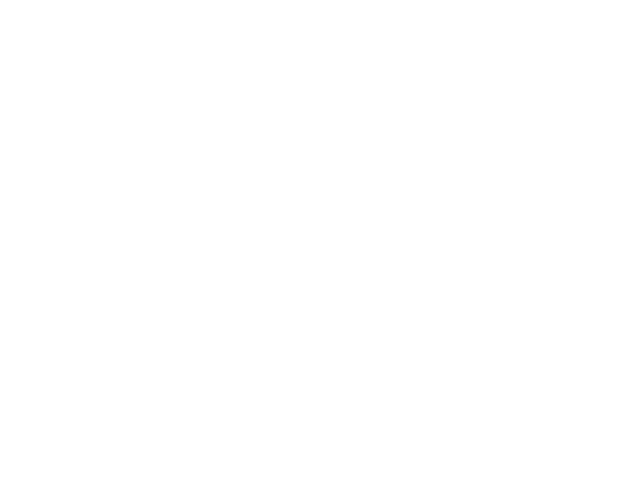

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


<IPython.core.display.Javascript object>


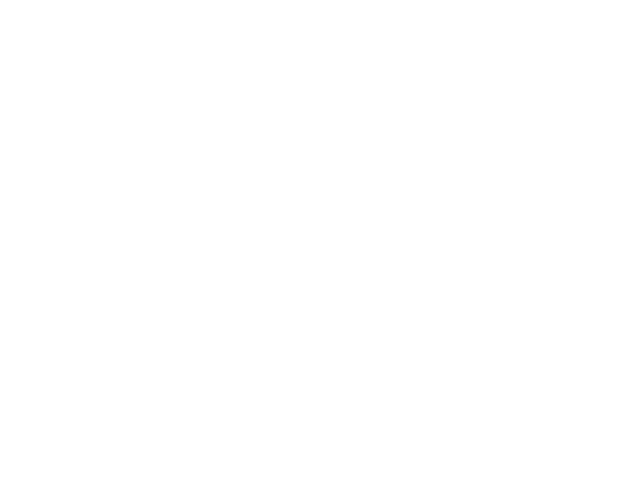

<IPython.core.display.Javascript object>


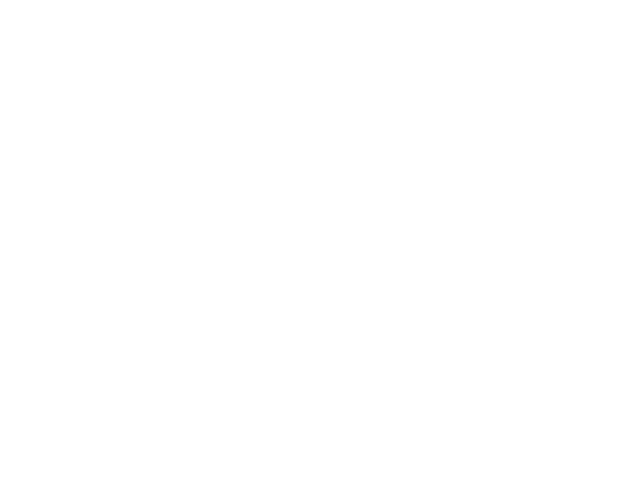

<IPython.core.display.Javascript object>


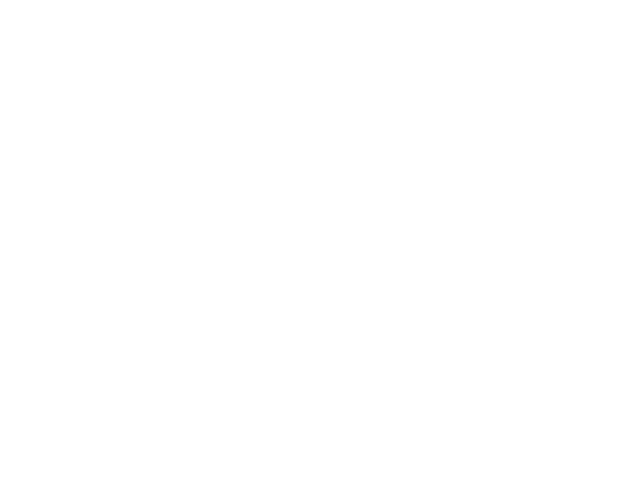

<IPython.core.display.Javascript object>


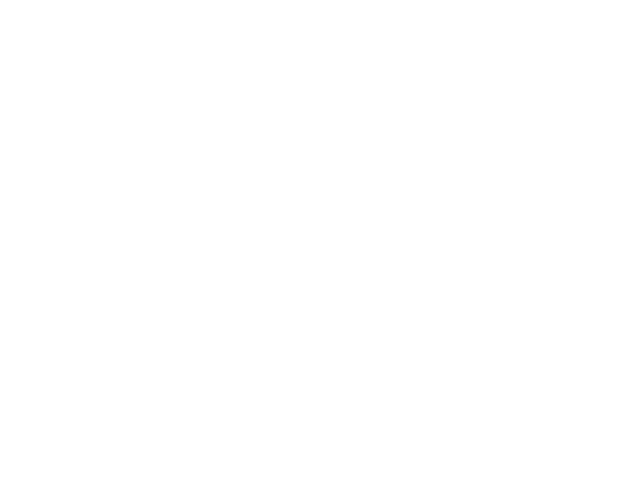

Text(0,0.5,'cross')

In [42]:
plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(iso,cross,k=k)
plt.xlabel('iso')
plt.ylabel('cross')

plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(center,cross,k=k)
plt.xlabel('center')
plt.ylabel('cross')

plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(center,iso,k=k)
plt.xlabel('center')
plt.ylabel('iso')

plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(center,ground,k=k)
plt.xlabel('center')
plt.ylabel('ground')

plt.figure()
for k in range(len(keylist)):
    center,ground,iso,cross=define_trials(k)
    scatter_two_means(ground,cross,k=k)
plt.xlabel('ground')
plt.ylabel('cross')

<IPython.core.display.Javascript object>


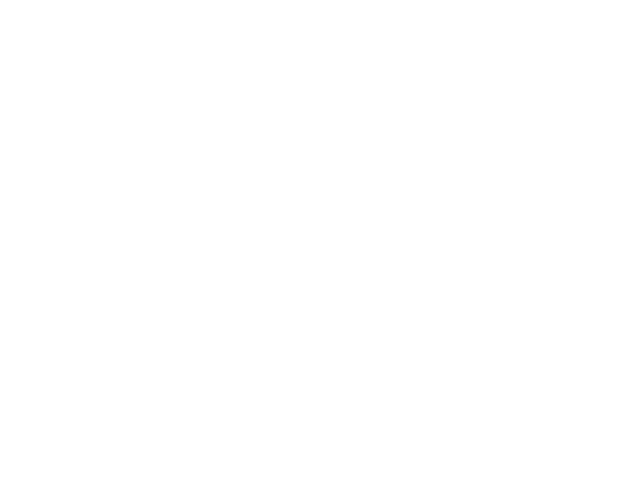

(0, 0.2)

In [37]:
plt.figure()
center = data_struct[keylist[k]]['stimulus_id'][0] == 1
ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
iso = data_struct[keylist[k]]['stimulus_id'][0] == 3
F1 = data_struct[keylist[k]]['F'][lkat][:,center][:,:,4:-4].mean(-1).mean(-1)
F2 = data_struct[keylist[k]]['F'][lkat][:,ground][:,:,4:-4].mean(-1).mean(-1)
F3 = data_struct[keylist[k]]['F'][lkat][:,iso][:,:,4:-4].mean(-1).mean(-1)
plt.scatter(F1+F2,F3,alpha=0.05)
plt.plot((0,0.2),(0,0.2))
plt.xlim(0,0.2)
plt.ylim(0,0.2)


<IPython.core.display.Javascript object>


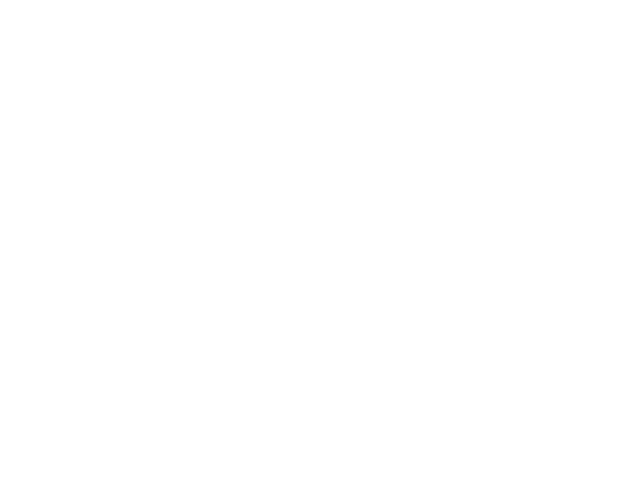

(0, 0.2)

In [38]:
plt.figure()
center = data_struct[keylist[k]]['stimulus_id'][0] == 1
ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
cross = data_struct[keylist[k]]['stimulus_id'][0] == 4
F1 = data_struct[keylist[k]]['F'][lkat][:,center][:,:,4:-4].mean(-1).mean(-1)
F2 = data_struct[keylist[k]]['F'][lkat][:,ground][:,:,4:-4].mean(-1).mean(-1)
F3 = data_struct[keylist[k]]['F'][lkat][:,cross][:,:,4:-4].mean(-1).mean(-1)
plt.scatter(F1+F2,F3,alpha=0.05)
plt.plot((0,0.2),(0,0.2))
plt.xlim(0,0.2)
plt.ylim(0,0.2)

In [39]:
interesting = F1+F2<F3

In [142]:
k = 0

In [40]:
ori_tuning = np.zeros((ncells,nangle,5))
ori_lb = np.zeros((ncells,nangle,5))
ori_ub = np.zeros((ncells,nangle,5))
for i in range(nangle):
    for j in range(5):
        thisangle = np.logical_and(data_struct[keylist[k]]['stimulus_id'][0]==j,data_struct[keylist[k]]['stimulus_id'][1]==i*45)
        tavg = np.nanmean(data_struct[keylist[k]]['F'][:,thisangle][:,:,4:-4],-1)
        for ii in range(tavg.shape[0]):
            ori_lb[ii,i,j],ori_ub[ii,i,j] = ut.bootstrap(tavg[ii],np.nanmean,axis=0,pct=(16,84))
        ori_tuning[:,i,j] = np.nanmean(tavg,-1)

<IPython.core.display.Javascript object>


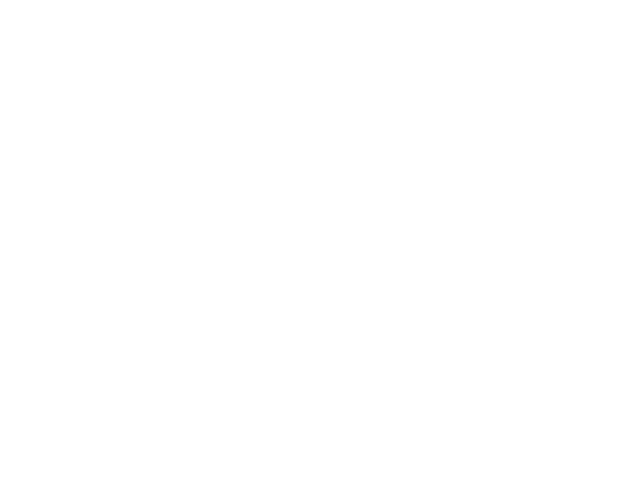

In [48]:
plt.figure()
ind = 5
def plot_center_ground_cross(ind):
    for which in (1,2,4):
        plt.fill_between(np.arange(8),ori_lb[lkat][interesting][ind,:,which],ori_ub[lkat][interesting][ind,:,which],alpha=0.5)
        
plot_center_ground_cross(ind)

In [49]:
indmax = interesting.sum()

<IPython.core.display.Javascript object>


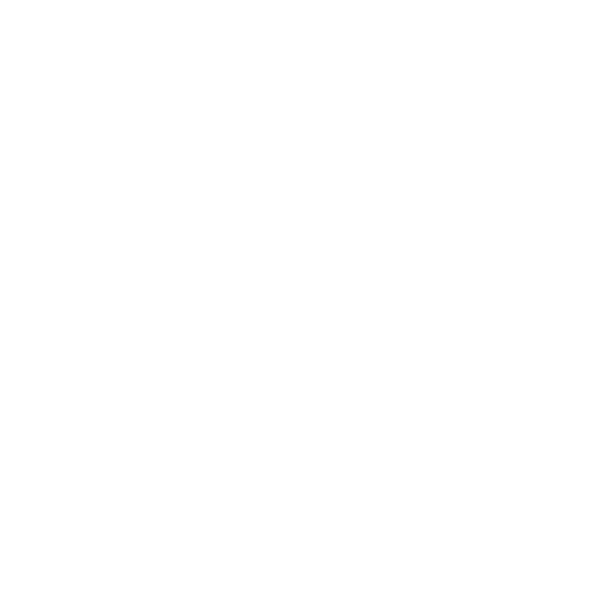

In [51]:
plt.figure(figsize=(6,6))
for i in range(indmax):
    plt.subplot(18,10,i+1)
    plot_center_ground_cross(i)
    plt.axis('off')